## SK1 Exercise

## Exercise 0: Modeling Preparation
- Read the clean data, which is named as df_clean_income_data.csv.
- Randomly sample 5000 rows as it's too big for a short demo (using a random seed of 999).
- Split the sampled data as 70% training set and the remaining 30% test set using a random seed of 999.
- Remember to separate target during the splitting process.
- Side question: Why do we need to set a random seed?

In [1]:
import pandas as pd

In [2]:
df_clean_income_data = pd.read_csv('data/df_clean_income_data.csv')
print(df_clean_income_data.shape)

(45222, 42)


In [3]:
df = df_clean_income_data.sample(n=5000, random_state=999)
print(df.shape)
df.head()

(5000, 42)


,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,target
29270,0.315068,0.600000,1.0,0.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
25610,0.095890,0.800000,1.0,0.0,0.193878,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
19125,0.287671,0.533333,1.0,1.0,0.397959,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
43423,0.356164,0.533333,1.0,0.0,0.142857,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
14464,0.273973,0.933333,1.0,1.0,0.602041,1.0,0.041742,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
target = df['target']
Data = df.drop(columns='target')
print(target.shape)
print(Data.shape)

(5000,)
(5000, 41)


In [5]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data,target,test_size=0.3,random_state=999)

In [6]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(3500, 41)
(1500, 41)
(3500,)
(1500,)


#### Q. Why do we need to set a random seed?

So that, whever we re-run our kernel we get the exact same split.

## Exercise 1
Verify whether training and test sets have similar proportion of target labels. Why is this step important?


In [7]:
sum(t_train/len(t_train))

0.2577142857142834

In [8]:
sum(t_test/len(t_test))

0.25000000000000155

## Exercise 2
Fit a nearest neighbor (NN) classifier with  $k=5$  neighbors using the Euclidean distance.
Fit the model on the train data and evaluate its performance on the test data using accuracy.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=2) #p=1 is Manhattan and p=2 is Euclidean distance
knn.fit(D_train,t_train)
knn.score(D_test,t_test)

0.814

## Exercise 3
- Extend Question 1 by fitting  k=1,3,5,10,15,20  neighbors using the Manhattan and Euclidean distances respectively.
- What is the optimal  k  value for each distance metric? That is, at which  k , the NN classifier returns the highest accuracy score? Note: We will learn later how to perform "grid search" to determine the optimal  k .
- Which distance metric seems to be better?

In [10]:
k_list = ([1,3,5,10,15,20])

knn_score_man=[]
knn_score_euc=[]

for k in k_list:
    knn_classifier_man = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_classifier_man = knn_classifier_man.fit(D_train,t_train)
    knn_score_man = knn_score_man + [knn_classifier_man.score(D_test,t_test)]
    
    knn_classifier_euc = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_classifier_euc.fit(D_train,t_train)
    knn_score_euc = knn_score_euc + [knn_classifier_euc.score(D_test,t_test)]

In [11]:
results = pd.DataFrame({'Score_man': knn_score_man, 'Score_euc':knn_score_euc},
                      index = k_list)

,Score_man,Score_euc
1,0.778667,0.778667
3,0.812000,0.804667
5,0.808000,0.814000
10,0.822667,0.824667
15,0.818667,0.820000
20,0.822000,0.822667


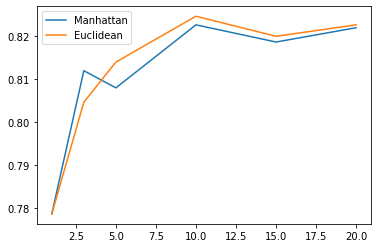

In [12]:
import matplotlib.pyplot as plt
x=knn_score_man
y=knn_score_euc
plt.plot(k_list,x, label='Manhattan')
plt.plot(k_list,y, label='Euclidean')
plt.legend()
results

## Exercise 4
- Fit a decision tree classifier with the entropy split criterion and a maximum depth of 5 on the train data, and then evaluate its performance on the test data.
- Does it perform better than the "best" KNN model from the previous question?

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(D_train,t_train)
dt.score(D_test,t_test)

0.8513333333333334

## Exercise 5
- Fit a random forest classifier with n_estimators=100 on train data, and then evaluate its performance on the test data.
- Does it perform better than the decision tree model in the previous question?

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(D_train,t_train)
rfc.score(D_test,t_test)

0.8406666666666667

## Exercise 6
- Fit a random forest classifier with n_estimators=250 on train data, and then evaluate its performance on the test data. 
- Does it return a higher accuracy compared to n_estimators=100?

In [15]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(D_train,t_train)
rfc.score(D_test,t_test)

0.84

## Exercise 7
- Fit to a Gaussian naive Bayes classifier with a variance smoothing value of  $10^−2$

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=10**(-2))
gnb.fit(D_train,t_train)
gnb.score(D_test,t_test)

0.7806666666666666

## Exercise 8
Fit to a support vector machine with default values.

In [17]:
from sklearn.svm import SVC

svm_class = SVC()
svm_class.fit(D_train,t_train)
svm_class.score(D_test,t_test)

0.8193333333333334

## Exercise 9
Predict the first three observations of the full cleaned data using the support vector machine built in the previous question.

In [18]:
new_obs = Data[0:5]
svm_class.predict(new_obs)

array([0, 0, 0, 0, 1], dtype=int64)

#### Lets see how other models are predicting:

In [19]:
print('Actual target values: ',*target[0:5])
print('Support Vector Machine: ', svm_class.predict(new_obs))
print('GaussianNB: ', gnb.predict(new_obs))
print('Random Forest: ',rfc.predict(new_obs))
print('deciontree: ',dt.predict(new_obs))
print('knn: ',knn.predict(new_obs))

Actual target values:  0 0 1 0 1
Support Vector Machine:  [0 0 0 0 1]
GaussianNB:  [0 0 0 1 1]
Random Forest:  [0 0 1 0 1]
deciontree:  [0 0 0 0 1]
knn:  [0 0 0 0 1]


## Exercise 10
Use `Pandas` to create a `confusion matrix` for the SVM model.<br>
**Hint:** Use pd.crosstab().<br>

In [20]:
predictions = svm_class.predict(D_test)

In [21]:
confusion_matrix = pd.crosstab(t_test,predictions,
                               rownames=['Actual'],colnames=['Predicted'],
                              margins=True)

confusion_matrix

Predicted,0,1,All
Actual,,,
0,1047,78,1125
1,193,182,375
All,1240,260,1500


## Exercise 11
- Which cells in the confusion matrix correspond to TP and TN?
- Calculate:
    - Accuracy rate
    - Error rate
    - Precision (across the "1" column)
    - Recall (across the "1" row)

In above confusion matrix; cell(0,0) is **TN** and cell(1,1) is **TP**.

In [22]:
y_test = t_test
y_pred = predictions

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Accuracy rate: ',accuracy_score(y_test, y_pred))
print('Error rate: ',1-accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))

Accuracy rate:  0.8193333333333334
Error rate:  0.18066666666666664
Precision:  0.7
Recall:  0.48533333333333334
